<a href="https://colab.research.google.com/github/yh08037/gnbai20201/blob/master/lab2/gnbai_lab2_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GnB AI Project Assignment
## Lab 2: Regularized Regression


### Tasks
1. data_lab2.txt의 데이터를 읽고, train 데이터 70%, test 데이터 30%로 분할하여라.
2. 다음의 가설 함수들에 대해 파라미터의 최적값을 구하여라.
    
    (비정규화 회귀는 최소 제곱법, 정규화 회귀는 closed-form solution 사용)
    
    * 비정규화 회귀 – 선형 모델
    * 비정규화 회귀 – 2차 다항식 모델
    * 비정규화 회귀 – 5차 다항식 모델
    * 정규화 회귀 – 5차 다항식 모델 (Ridge)

3. train 데이터 위에 학습된 회귀자들을 plot하고, train error를 구하여라.
4. test 데이터 위에 학습된 회귀자들을 plot하고, test error를 구하여라

### Imports

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Train-test split

In [51]:
# pandas를 통해 txt 파일 읽어오기
name_file = './data_lab2.txt'
columns = ['x', 'y']

data_pd = pd.read_csv(name_file, names=columns, sep='\t')

print(data_pd)

         x       y
0     2.94  34.340
1     3.06  34.520
2     3.07  34.318
3     3.16  34.360
4     3.26  34.490
..     ...     ...
195  16.10  33.770
196  16.14  33.808
197  16.52  33.851
198  16.82  33.953
199  17.10  33.950

[200 rows x 2 columns]


In [52]:
# pandas dataframe을 numpy array로 변환
data_np = data_pd.values

# data_pd는 더이상 필요하지 않으므로 메모리를 비워줍니다.
del data_pd

# 데이터의 순서를 랜덤으로 섞기
np.random.shuffle(data_np)

# 처음과 끝의 5개의 데이터를 출력
print(data_np[:5])
print('...')
print(data_np[-5:])

[[ 3.56  34.24 ]
 [13.22  33.478]
 [15.86  33.62 ]
 [14.95  33.654]
 [11.13  33.53 ]]
...
[[11.04  33.87 ]
 [ 9.23  33.033]
 [ 7.49  33.828]
 [ 9.95  33.549]
 [ 5.79  33.955]]


In [53]:
# train set과 test set의 크기를 결정
data_size = len(data_np)

train_size = int(data_size * 0.7)
test_size = data_size - train_size

# train-test set 나누기
x_train = data_np[:train_size, 0].reshape(-1, 1)
y_train = data_np[:train_size, 1].reshape(-1, 1)

x_test = data_np[-test_size:, 0].reshape(-1, 1)
y_test = data_np[-test_size:, 1].reshape(-1, 1)

# data_np도 더이상 필요하지 않으므로 메모리를 비워줍니다.
del data_np

print("shape of x_train :", x_train.shape)
print("shape of y_train :", y_train.shape)
print("shape of x_test :", x_test.shape)
print("shape of y_test :", y_test.shape)

shape of x_train : (140, 1)
shape of y_train : (140, 1)
shape of x_test : (60, 1)
shape of y_test : (60, 1)


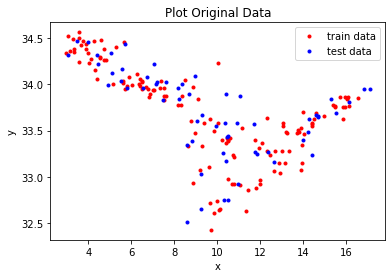

In [54]:
# data plot하기
plt.title('Plot Original Data')
plt.plot(x_train, y_train, 'r.', label='train data')
plt.plot(x_test, y_test, 'b.', label='test data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 2. Finding optimal parameters

#### 모델 정의

1. 비정규화 회귀 – 선형 모델
    
    $h_\theta^{(1)}(x)=\theta_0+\theta_1x_1 \quad\quad\left(x_n=x^n\right)$

2. 비정규화 회귀 – 2차 다항식 모델
    
    $h_\theta^{(2)}(x)=\theta_0+\theta_1x_1+\theta_2x_2$

3. 비정규화 회귀 – 5차 다항식 모델
    
    $h_\theta^{(3)}(x)=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_3+\theta_4x_4+\theta_5x_5$

4. 정규화 회귀 – 5차 다항식 모델 (Ridge)
    
    $h_\theta^{(4)}(x)=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_3+\theta_4x_4+\theta_5x_5$


##### 각 모델들의 x 행렬
$
X^{(h^{(1)})}=
  \begin{bmatrix}
    1 & x_1^{(1)} \\
    1 & x_1^{(2)} \\
    \vdots & \vdots \\
    1 & x_1^{(I)} \\
  \end{bmatrix}
$ 

$
X^{(h^{(2)})}=
  \begin{bmatrix}
    1 & x_1^{(1)} & x_2^{(1)} \\
    1 & x_1^{(2)}& x_2^{(2)} \\
    \vdots & \vdots & \vdots \\
    1 & x_1^{(I)}& x_2^{(I)} \\
  \end{bmatrix}
$ 

$
X^{(h^{(3)})}=
  \begin{bmatrix}
    1 & x_1^{(1)} & \cdots & x_5^{(1)} \\
    1 & x_1^{(2)}& \cdots & x_5^{(2)} \\
    \vdots & \vdots &  & \vdots \\
    1 & x_1^{(I)}& \cdots & x_5^{(I)} \\
  \end{bmatrix}
$ 

$
X^{(h^{(4)})}=
  \begin{bmatrix}
    1 & x_1^{(1)} & \cdots & x_5^{(1)} \\
    1 & x_1^{(2)}& \cdots & x_5^{(2)} \\
    \vdots & \vdots &  & \vdots \\
    1 & x_1^{(I)}& \cdots & x_5^{(I)} \\
  \end{bmatrix}
$


In [55]:
# 1. 비정규화 선형 회귀: x1_train
x1_train = np.column_stack((np.ones_like(x_train),x_train))

# 2. 비정규화 2차 회귀: x2_train
x2_train = np.column_stack((x1_train, x_train**2))

# 3. 비정규화 5차 회귀: x3_train
x3_train = np.column_stack((x2_train, x_train**3, x_train**4, x_train**5))

# 4. 정규화 5차 회귀: x4_train
x4_train = x3_train

# x1_train, x2_train, x3_train, x4_train의 shape 출력
print(np.shape(x1_train))
print(np.shape(x2_train))
print(np.shape(x3_train))
print(np.shape(x4_train))

(140, 2)
(140, 3)
(140, 6)
(140, 6)


In [56]:
# 1. 비정규화 선형 회귀: x1_test
x1_test = np.column_stack((np.ones_like(x_test),x_test))

# 2. 비정규화 2차 회귀: x2_test
x2_test = np.column_stack((x1_test, x_test**2))

# 3. 비정규화 5차 회귀: x3_test
x3_test = np.column_stack((x2_test, x_test**3, x_test**4, x_test**5))

# 4. 정규화 5차 회귀: x4_test
x4_test = x3_test

# x1_test, x2_test, x3_test, x4_test의 shape 출력
print(np.shape(x1_test))
print(np.shape(x2_test))
print(np.shape(x3_test))
print(np.shape(x4_test))

(60, 2)
(60, 3)
(60, 6)
(60, 6)


#### 2) Finding parameters
1. 비정규화 회귀 모델의 최소 제곱법에 의한 해
    
    $\theta^*=\left(x^Tx\right)^{-1}x^Ty$

2. Ridge 정규화 회귀 모델의 닫힌 형태의 해
    
    $\theta^*=\left(x^Tx+\lambda
   \begin{bmatrix}
      0 & 0 & \cdots & 0 \\
      0 & 1 & \cdots & 0 \\
      \vdots & \vdots & \ddots & \vdots \\
      0 & 0 & \cdots & 1 \\
   \end{bmatrix}
    \right)^{-1}x^Ty$

In [57]:
def cal(x, y):
    value = np.matmul(np.transpose(x), x)
    value = np.linalg.inv(value)
    value = np.matmul(value, np.transpose(x))
    value = np.matmul(value, y)
    return value

# 1. 비정규화 선형 회귀: theta1
theta1 = cal(x1_train, y_train)

# 2. 비정규화 2차 회귀: theta2
theta2 = cal(x2_train, y_train)

# 3. 비정규화 5차 회귀: theta3
theta3 = cal(x3_train, y_train)

# 4. 정규화 5차 회귀: theta4

Lambda = 0.2
one = np.matmul(np.transpose(x4_train), x4_train)
two = np.eye(np.shape(x4_train)[1])
two[0][0] = 0
two = Lambda * two
theta4 = np.matmul(np.matmul(np.linalg.inv((one + two)), np.transpose(x4_train)), y_train);

# theta값 출력
print(theta1)
print(theta2)
print(theta3)
print(theta4)


[[34.41768037]
 [-0.07672515]]
[[ 3.59368128e+01]
 [-4.59951476e-01]
 [ 2.01026449e-02]]
[[ 3.67683715e+01]
 [-1.79763142e+00]
 [ 5.26581083e-01]
 [-7.43097785e-02]
 [ 4.65912533e-03]
 [-1.04874716e-04]]
[[ 3.44683587e+01]
 [-2.51135313e-01]
 [ 1.46063804e-01]
 [-3.09282989e-02]
 [ 2.33914956e-03]
 [-5.78324836e-05]]


## 3. Plot training data with fitted curve

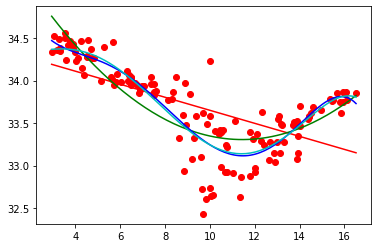

In [58]:
# 데이터의 순서를 shuffle했기 때문에 
# 데이터의 순서대로 plot하면 정상적으로 그려지지 않으므로
# 일정한 간격으로 오름차순의 구간을 만들어주는 np.linspace 사용
# 참고 하여 만듬

# x_train의 최솟값부터 최댓값까지 128등분
x = np.linspace(min(x_train), max(x_train), 128)

y1_train=theta1[0]+theta1[1]*x
y2_train=theta2[0]+theta2[1]*x+theta2[2]*(x**2)
y3_train=theta3[0]+theta3[1]*x+theta3[2]*(x**2)+theta3[3]*(x**3)+theta3[4]*(x**4)+theta3[5]*(x**5)
y4_train=theta4[0]+theta4[1]*x+theta4[2]*(x**2)+theta4[3]*(x**3)+theta4[4]*(x**4)+theta4[5]*(x**5)

# train data와 regressor 함께 plot하기

plt.plot(x_train, y_train,'ro')
plt.plot(x,y1_train,'r')
plt.plot(x,y2_train,'g')
plt.plot(x,y3_train,'b')
plt.plot(x,y4_train,'c')


## 4. Compute traing errors

* MSE (Mean of Squared Error)
    - 데이터의 갯수가 다르더라도 오차값을 비교할 수 있다.

$$MSE=\dfrac{1}{I}\sum_{i=1}^I\left(\hat{y}-y\right)^2$$

* SSE (Sum of Squared Error)
    - 미분 계산 시에 수식이 깔끔하다.

$$SSE=\dfrac{1}{2}\sum_{i=1}^I\left(\hat{y}-y\right)^2$$

In [59]:
def MSE(y_hat, y):
    result = 0.
    # result 값을 완성해보세요!
    for i in range(y.shape[0]):
      result += pow((y_hat[i]-y[i]),2)

    result = (1/y.shape[0])*result
    return result

In [60]:
def get_error(theta_n, x_n, y):

    # 임의의 회귀 모델의 입력 x_n과
    # 계산한 파라미터 theta_n으로
    # y_hat 행렬을 구해보세요!

    y_hat = np.matmul(x_n, theta_n);
    return MSE(y_hat, y)

In [61]:
# get_error() 함수로 4개의 모델의 train error 구하기
train_error1=get_error(theta1,x1_train,y_train)
train_error2=get_error(theta2,x2_train,y_train)
train_error3=get_error(theta3,x3_train,y_train)
train_error4=get_error(theta4,x4_train,y_train)

# train error 출력하기
print(train_error1)
print(train_error2)
print(train_error3)
print(train_error4)

[0.15645517]
[0.07781579]
[0.05683151]
[0.05746766]


## 5. Plot test data with fitted curve

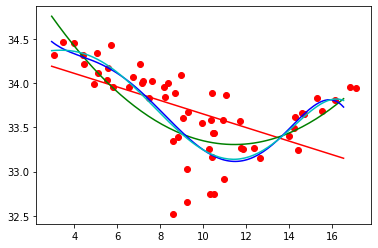

In [62]:
# x_test의 최솟값부터 최댓값까지 128등분
x_128 = np.linspace(min(x_train), max(x_train), 128)

# test data와 regressor 함께 plot하기
plt.plot(x_test,y_test,'ro')
plt.plot(x,y1_train,'r')
plt.plot(x,y2_train,'g')
plt.plot(x,y3_train,'b')
plt.plot(x,y4_train,'c')

## 6. Compute test errors

In [63]:
# get_error() 함수로 4개의 모델의 test error 구하기

test_error1 = get_error(theta1,x1_test,y_test)
test_error2 = get_error(theta2,x2_test,y_test)
test_error3 = get_error(theta3,x3_test,y_test)
test_error4 = get_error(theta4,x4_test,y_test)

# test error 출력하기
print(test_error1)
print(test_error2)
print(test_error3)
print(test_error4)

[0.16967822]
[0.10410112]
[0.09950529]
[0.0954887]
